In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_cleaned.csv')

In [3]:

df.head()

,Unnamed: 0,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [6]:
## The data set is cleaned so we right away start the model building 

In [7]:
#lets conver the column Classes into Binary value
# 0 ---> No fire
# 1 ---> Fire

In [8]:
df['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

In [9]:
df['Classes'].replace(['fire','not fire'],[1,0],inplace=True)

In [10]:
df['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [11]:
#Making the model without handeling the imbalanced data 

In [12]:
#Before doing that lest check all the column are in numerical form

In [13]:
df.dtypes

month            int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object

In [14]:
X=df.drop('Classes',axis=1)
y=df['Classes']

In [15]:
X.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=34)

In [18]:
## Standardize or feature scaling The datasets

In [19]:
from sklearn.preprocessing import StandardScaler 

In [20]:
scaler=StandardScaler()
scaler

StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)
x_test=scaler.transform(x_test)

In [22]:
## Model Traing

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model=LogisticRegression()
model

LogisticRegression()

In [25]:
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
model.score(X_train,y_train)

0.9647058823529412

In [27]:
y_pred=model.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.9594594594594594

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       1.00      0.94      0.97        47

    accuracy                           0.96        74
   macro avg       0.95      0.97      0.96        74
weighted avg       0.96      0.96      0.96        74



In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm=confusion_matrix(y_test,y_pred)

In [34]:
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'Pred')

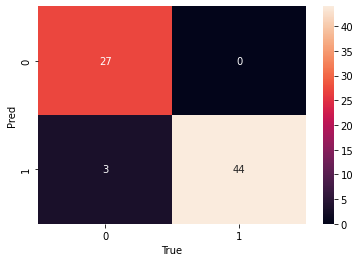

In [35]:
sns.heatmap(cm,annot=True)
plt.xlabel("True")
plt.ylabel('Pred')

In [44]:
df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [45]:
df_1=df[df['Classes']==1]

In [46]:
df_0=df[df['Classes']==0]

In [47]:
df_1.shape

(138, 13)

In [48]:
df_0.shape

(106, 13)

In [51]:
df_1_trimed=df_1.iloc[:106,:]

In [55]:
df_trimed=pd.concat([df_1_trimed,df_0],axis=0)

In [56]:
df_trimed['Classes'].value_counts()

1    106
0    106
Name: Classes, dtype: int64

In [57]:
#Making the model with handeling the imbalanced data 

In [58]:
X=df_trimed.drop('Classes',axis=1)
y=df_trimed['Classes']

In [59]:
X_train=scaler.fit_transform(X_train)
x_test=scaler.transform(x_test)

In [60]:
## Model Traing
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model

LogisticRegression()

In [61]:
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
model.score(X_train,y_train)

0.9647058823529412

In [63]:
y_pred=model.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9594594594594594

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       1.00      0.94      0.97        47

    accuracy                           0.96        74
   macro avg       0.95      0.97      0.96        74
weighted avg       0.96      0.96      0.96        74



In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
cm=confusion_matrix(y_test,y_pred)

In [68]:
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'Pred')

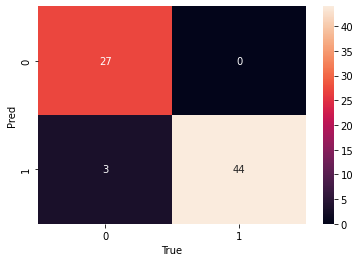

In [69]:
sns.heatmap(cm,annot=True)
plt.xlabel("True")
plt.ylabel('Pred')